Here,I am going to create to Telecome Delinquency-Model,which can predict that wether a customer will be paying back the loaned amount withnin 5 days or not.
for this purpose i need to build classification model using machine learning techniques.
I am going to build four classifier model and compare their accuracy,and going furthur with best classifition model.

All  required  Libraries are loaded first
PANDAS used for Data handling 
MATPLOTLIB and  SEABORN used for Data Visualization
Numpy Provides faster data handling and also important mathematical features

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

import google drive for Data Loading 

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data=pd.read_csv("/content/drive/My Drive/sample_data_intw.csv")

uses following codes for varification of Data-set.
It help us to undesrtand how much instances we have, which is the row number and the columns Number tell us about the feature in the data

In [8]:
data.tail()
data.size
data.count()


Unnamed: 0              209593
label                   209593
msisdn                  209593
aon                     209593
daily_decr30            209593
daily_decr90            209593
rental30                209593
rental90                209593
last_rech_date_ma       209593
last_rech_date_da       209593
last_rech_amt_ma        209593
cnt_ma_rech30           209593
fr_ma_rech30            209593
sumamnt_ma_rech30       209593
medianamnt_ma_rech30    209593
medianmarechprebal30    209593
cnt_ma_rech90           209593
fr_ma_rech90            209593
sumamnt_ma_rech90       209593
medianamnt_ma_rech90    209593
medianmarechprebal90    209593
cnt_da_rech30           209593
fr_da_rech30            209593
cnt_da_rech90           209593
fr_da_rech90            209593
cnt_loans30             209593
amnt_loans30            209593
maxamnt_loans30         209593
medianamnt_loans30      209593
cnt_loans90             209593
amnt_loans90            209593
maxamnt_loans90         209593
medianam

In [9]:
data

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


## Payb=paying back 
# npayb=not paying back 
# use matplotlib for knowing the graphical realation of feautures

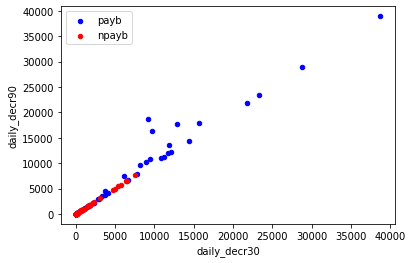

In [10]:
payb=data[data['label']==1][0:70]
npayb=data[data['label']==0][0:70]
axes=payb.plot(kind='scatter', x= 'daily_decr30' , y='daily_decr90' , color='blue',label='payb')
npayb.plot(kind='scatter',x='daily_decr30',y='daily_decr90',color='red',label='npayb',ax=axes)

It Tells us about the data Types of all the feature in the data


In [11]:
data.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

data of unnamed column is useless for model,so i am going to drop it

In [0]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [13]:

data.shape

(209593, 36)

This tells about if the number of rows are null or not

In [14]:
data.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

description of data set like-number of data point,mean,freq,unique 

In [15]:
data.describe(include='all')

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
count,209593.000000,209593,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593,209593
unique,NaN,186243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,82
top,NaN,04581I85330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UPW,2016-07-04
freq,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209593,3150
mean,0.875177,NaN,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,NaN,NaN
std,0.330519,NaN,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,NaN,NaN
min,0.000000,NaN,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,1.000000,NaN,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,1.000000,NaN,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,NaN,NaN
75%,1.000000,NaN,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,NaN,NaN


In [16]:
data[:][data['msisdn']=='04581I85330']

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
6275,1,04581I85330,513.0,99.792,99.792,1489.50,1489.50,1.0,0.0,1539,7,3.0,10197.0,1539.0,27.0,8,3,11144,1539.0,30.5,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.285714,2.285714,UPW,2016-06-18
14274,1,04581I85330,562.0,5206.792,5273.320,1889.76,2882.76,5.0,0.0,1539,9,1.0,13082.0,1539.0,24.0,14,3,19609,1539.0,25.5,0.0,0.0,0,0,10,60,6.0,0.0,13.0,78,6,0.0,2.444444,2.615385,UPW,2016-07-12
33543,1,04581I85330,509.0,88.704,88.704,1324.00,1324.00,1.0,0.0,1539,6,3.0,8658.0,1539.0,23.5,7,3,9605,1539.0,34.0,0.0,0.0,0,0,5,30,6.0,0.0,5.0,30,6,0.0,2.333333,2.333333,UPW,2016-06-16
64319,1,04581I85330,480.0,5.544,5.544,82.75,82.75,2.0,0.0,1547,3,3.0,4041.0,1547.0,47.0,4,32,4988,1247.0,40.5,0.0,0.0,0,0,2,12,6.0,0.5,2.0,12,6,0.5,2.000000,2.000000,UPW,2016-06-01
132784,1,04581I85330,602.0,22845.000,28260.320,6263.82,9146.58,1.0,0.0,1539,11,3.0,18084.0,1539.0,13.0,24,3,36746,1539.0,19.0,0.0,0.0,0,0,6,36,6.0,0.0,19.0,114,6,0.0,2.555556,2.590909,UPW,2016-08-13
132956,1,04581I85330,606.0,1146.000,1146.000,869.56,869.56,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-17
158319,1,04581I85330,601.0,20023.000,25402.320,5341.82,8224.58,2.0,0.0,1924,9,3.0,15006.0,1539.0,13.0,22,3,33668,1539.0,19.0,0.0,0.0,0,0,5,30,6.0,0.0,18.0,108,6,0.0,2.857143,2.700000,UPW,2016-08-12


In [0]:
pd.set_option('display.max_column',40)

In [18]:
data

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


There are only numeric data is needed to build a machine learning model .so,Changing each data into numeric for for both test and train

In [0]:
Y=data.iloc[:,0]

In [0]:
for i in data.columns:
    if i=='pdate':
        continue
    else:
        data[i]=pd.to_numeric(data[i],errors='coerce')

In [21]:
data.describe(include='all')

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
count,209593.000000,0.0,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,0.0,209593
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-04
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3150
mean,0.875177,NaN,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,NaN,NaN
std,0.330519,NaN,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,NaN,NaN
min,0.000000,NaN,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,1.000000,NaN,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,1.000000,NaN,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,NaN,NaN
75%,1.000000,NaN,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,NaN,NaN


In [0]:
labels=dict(enumerate(data.columns))

In [23]:
labels

{0: 'label',
 1: 'msisdn',
 2: 'aon',
 3: 'daily_decr30',
 4: 'daily_decr90',
 5: 'rental30',
 6: 'rental90',
 7: 'last_rech_date_ma',
 8: 'last_rech_date_da',
 9: 'last_rech_amt_ma',
 10: 'cnt_ma_rech30',
 11: 'fr_ma_rech30',
 12: 'sumamnt_ma_rech30',
 13: 'medianamnt_ma_rech30',
 14: 'medianmarechprebal30',
 15: 'cnt_ma_rech90',
 16: 'fr_ma_rech90',
 17: 'sumamnt_ma_rech90',
 18: 'medianamnt_ma_rech90',
 19: 'medianmarechprebal90',
 20: 'cnt_da_rech30',
 21: 'fr_da_rech30',
 22: 'cnt_da_rech90',
 23: 'fr_da_rech90',
 24: 'cnt_loans30',
 25: 'amnt_loans30',
 26: 'maxamnt_loans30',
 27: 'medianamnt_loans30',
 28: 'cnt_loans90',
 29: 'amnt_loans90',
 30: 'maxamnt_loans90',
 31: 'medianamnt_loans90',
 32: 'payback30',
 33: 'payback90',
 34: 'pcircle',
 35: 'pdate'}

In [24]:
data['aon'].mean()

8112.343444891092

In [25]:
data['rental90'].mean()

3483.406534235238

In [26]:
data.describe()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle
count,209593.000000,0.0,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,0.0
mean,0.875177,NaN,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,NaN
std,0.330519,NaN,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,NaN
min,0.000000,NaN,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,1.000000,NaN,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,NaN
50%,1.000000,NaN,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,NaN
75%,1.000000,NaN,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,NaN
max,1.000000,NaN,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,NaN


In [0]:
data.drop(['msisdn','pdate'],axis=1,inplace=True)

In [0]:
mode=data['aon'].mode()

In [0]:
mode=mode.astype(float)

In [0]:
data['aon']=data['aon'].fillna(95)

In [31]:
data['aon'].mode()

0    95.0
dtype: float64

In [0]:
mode=dict(enumerate(data[i].mode() for i in data.columns))

In [0]:
labels=dict(enumerate(data.columns))

In [0]:
List=[]
for i,j in mode.items():
    List.append(j)

In [35]:
List

[0    1
 dtype: int64, 0    95.0
 dtype: float64, 0    0.0
 dtype: float64, 0    0.0
 dtype: float64, 0    0.0
 dtype: float64, 0    0.0
 dtype: float64, 0    1.0
 dtype: float64, 0    0.0
 dtype: float64, 0    1539
 dtype: int64, 0    1
 dtype: int64, 0    0.0
 dtype: float64, 0    0.0
 dtype: float64, 0    1539.0
 dtype: float64, 0    0.0
 dtype: float64, 0    1
 dtype: int64, 0    0
 dtype: int64, 0    0
 dtype: int64, 0    1539.0
 dtype: float64, 0    0.0
 dtype: float64, 0    0.0
 dtype: float64, 0    0.0
 dtype: float64, 0    0
 dtype: int64, 0    0
 dtype: int64, 0    1
 dtype: int64, 0    6
 dtype: int64, 0    6.0
 dtype: float64, 0    0.0
 dtype: float64, 0    1.0
 dtype: float64, 0    6
 dtype: int64, 0    6
 dtype: int64, 0    0.0
 dtype: float64, 0    0.0
 dtype: float64, 0    0.0
 dtype: float64, Series([], dtype: float64)]

In [36]:
data[data.notnull()].count()

label                   209593
aon                     209593
daily_decr30            209593
daily_decr90            209593
rental30                209593
rental90                209593
last_rech_date_ma       209593
last_rech_date_da       209593
last_rech_amt_ma        209593
cnt_ma_rech30           209593
fr_ma_rech30            209593
sumamnt_ma_rech30       209593
medianamnt_ma_rech30    209593
medianmarechprebal30    209593
cnt_ma_rech90           209593
fr_ma_rech90            209593
sumamnt_ma_rech90       209593
medianamnt_ma_rech90    209593
medianmarechprebal90    209593
cnt_da_rech30           209593
fr_da_rech30            209593
cnt_da_rech90           209593
fr_da_rech90            209593
cnt_loans30             209593
amnt_loans30            209593
maxamnt_loans30         209593
medianamnt_loans30      209593
cnt_loans90             209593
amnt_loans90            209593
maxamnt_loans90         209593
medianamnt_loans90      209593
payback30               209593
payback9

In [0]:
data.drop('pcircle',axis=1,inplace=True)

In [38]:
data[data.notnull()].count()

label                   209593
aon                     209593
daily_decr30            209593
daily_decr90            209593
rental30                209593
rental90                209593
last_rech_date_ma       209593
last_rech_date_da       209593
last_rech_amt_ma        209593
cnt_ma_rech30           209593
fr_ma_rech30            209593
sumamnt_ma_rech30       209593
medianamnt_ma_rech30    209593
medianmarechprebal30    209593
cnt_ma_rech90           209593
fr_ma_rech90            209593
sumamnt_ma_rech90       209593
medianamnt_ma_rech90    209593
medianmarechprebal90    209593
cnt_da_rech30           209593
fr_da_rech30            209593
cnt_da_rech90           209593
fr_da_rech90            209593
cnt_loans30             209593
amnt_loans30            209593
maxamnt_loans30         209593
medianamnt_loans30      209593
cnt_loans90             209593
amnt_loans90            209593
maxamnt_loans90         209593
medianamnt_loans90      209593
payback30               209593
payback9

In [39]:
data['label'][data['label']==1].count()

183431

In [40]:
data['label'][data['label']==0].count()

26162

In [0]:
headnames=[str(i) for i in data.columns]

In [42]:
headnames

['label',
 'aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_date_da',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech30',
 'fr_da_rech30',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'medianamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'payback30',
 'payback90']

I used the normalizer to stop the spread of the data,
I Normalized both training and testing data 


In [0]:
from sklearn.preprocessing import Normalizer
scaller=Normalizer()

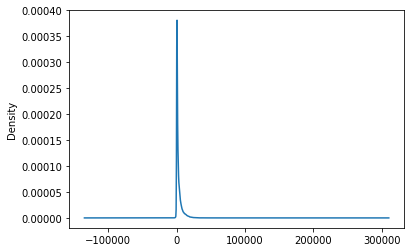

In [44]:
data.rental30.plot(kind='density')

In [0]:
Y=data.label

In [0]:
data.drop('label',axis=1,inplace=True)

In [0]:
data=scaller.fit_transform(data)

In [0]:
data=pd.DataFrame(data,columns=headnames[1:])

In [49]:
data

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0.040558,0.455545,0.457051,0.032824,0.038789,0.000298,0.000000,0.229483,0.000298,0.003131,0.458967,0.229483,0.001118,0.000298,0.003131,0.458967,0.229483,0.001118,0.0,0.0,0.000000,0.0,0.000298,0.001789,0.000895,0.0,0.000298,0.001789,0.000895,0.0,0.004324,0.004324
1,0.032192,0.548083,0.548207,0.166896,0.166896,0.000904,0.000000,0.261653,0.000045,0.000000,0.261653,0.261653,0.002760,0.000045,0.000000,0.261653,0.261653,0.002760,0.0,0.0,0.000000,0.0,0.000045,0.000543,0.000543,0.0,0.000045,0.000543,0.000543,0.0,0.000000,0.000000
2,0.127283,0.332602,0.332602,0.214152,0.214152,0.000714,0.000000,0.366148,0.000238,0.000000,0.366148,0.366148,0.015778,0.000238,0.000000,0.366148,0.366148,0.015778,0.0,0.0,0.000000,0.0,0.000238,0.001427,0.001427,0.0,0.000238,0.001427,0.001427,0.0,0.000000,0.000000
3,0.143966,0.012681,0.012681,0.095233,0.095233,0.024492,0.000000,0.565709,0.000000,0.000000,0.000000,0.000000,0.000000,0.000597,0.000000,0.565709,0.565709,0.001493,0.0,0.0,0.000000,0.0,0.001195,0.007168,0.003584,0.0,0.001195,0.007168,0.003584,0.0,0.000000,0.000000
4,0.030319,0.004822,0.004822,0.035182,0.035182,0.000128,0.000000,0.073925,0.000224,0.000064,0.641247,0.073925,0.000928,0.000256,0.000064,0.752247,0.092462,0.001121,0.0,0.0,0.000000,0.0,0.000224,0.001345,0.000192,0.0,0.000224,0.001345,0.000192,0.0,0.000075,0.000075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,0.025266,0.009498,0.009498,0.068118,0.068118,0.000063,0.000000,0.253163,0.000188,0.000125,0.650668,0.198753,0.005742,0.000188,0.000125,0.650668,0.198753,0.005742,0.0,0.0,0.000000,0.0,0.000125,0.000750,0.000375,0.0,0.000125,0.000750,0.000375,0.0,0.000063,0.000063
209589,0.182149,0.006258,0.006258,0.292856,0.292856,0.000678,0.000000,0.130978,0.000678,0.000169,0.523913,0.130978,0.027331,0.001017,0.000339,0.684204,0.130978,0.018944,0.0,0.0,0.000000,0.0,0.000508,0.003050,0.001017,0.0,0.000508,0.003050,0.001017,0.0,0.000169,0.000169
209590,0.035028,0.409517,0.411634,0.202693,0.307513,0.000104,0.000000,0.053216,0.000173,0.000277,0.322755,0.053216,0.001768,0.000380,0.000173,0.642883,0.053216,0.001630,0.0,0.0,0.000000,0.0,0.000138,0.001452,0.000415,0.0,0.000207,0.001867,0.000415,0.0,0.000138,0.000133
209591,0.061433,0.442953,0.446008,0.014607,0.034923,0.000071,0.001348,0.027418,0.000177,0.000142,0.431098,0.027418,0.005817,0.000213,0.000142,0.636360,0.085499,0.003547,0.0,0.0,0.000035,0.0,0.000071,0.000638,0.000426,0.0,0.000106,0.000851,0.000426,0.0,0.000000,0.000372


In [50]:
from sklearn.ensemble import ExtraTreesClassifier as etc
array=data.values
x=array
y=Y.values
model=etc()
model.fit(x,y)
score=model.feature_importances_
score

array([0.04982066, 0.08041259, 0.07834617, 0.06228316, 0.05793473,
       0.03843985, 0.00323267, 0.02962804, 0.02564707, 0.01431262,
       0.04399949, 0.03071432, 0.02394857, 0.0259697 , 0.01813638,
       0.06288251, 0.03629717, 0.02656277, 0.00233114, 0.00129037,
       0.00291777, 0.00087922, 0.04363785, 0.04113023, 0.03741728,
       0.00724921, 0.03331833, 0.03831567, 0.04975994, 0.00697478,
       0.01195155, 0.01425818])

In [0]:
answer=list(zip(data.columns,score))

In [52]:
answer

[('aon', 0.049820663458085876),
 ('daily_decr30', 0.0804125935257141),
 ('daily_decr90', 0.07834617235521547),
 ('rental30', 0.06228316349236709),
 ('rental90', 0.05793473206409745),
 ('last_rech_date_ma', 0.0384398461123252),
 ('last_rech_date_da', 0.0032326694671248792),
 ('last_rech_amt_ma', 0.029628040457478477),
 ('cnt_ma_rech30', 0.025647069571283026),
 ('fr_ma_rech30', 0.014312624870006143),
 ('sumamnt_ma_rech30', 0.04399948840623477),
 ('medianamnt_ma_rech30', 0.03071432013774917),
 ('medianmarechprebal30', 0.023948572937161558),
 ('cnt_ma_rech90', 0.025969701244414764),
 ('fr_ma_rech90', 0.01813638324665035),
 ('sumamnt_ma_rech90', 0.06288251288081219),
 ('medianamnt_ma_rech90', 0.03629717411043287),
 ('medianmarechprebal90', 0.026562769055815075),
 ('cnt_da_rech30', 0.002331136509554263),
 ('fr_da_rech30', 0.0012903669192576525),
 ('cnt_da_rech90', 0.002917766854345777),
 ('fr_da_rech90', 0.0008792202185488115),
 ('cnt_loans30', 0.04363784890479463),
 ('amnt_loans30', 0.04113

In [53]:
from operator import itemgetter
sorted(answer,key=itemgetter(1),reverse=True)

[('daily_decr30', 0.0804125935257141),
 ('daily_decr90', 0.07834617235521547),
 ('sumamnt_ma_rech90', 0.06288251288081219),
 ('rental30', 0.06228316349236709),
 ('rental90', 0.05793473206409745),
 ('aon', 0.049820663458085876),
 ('maxamnt_loans90', 0.04975994141782782),
 ('sumamnt_ma_rech30', 0.04399948840623477),
 ('cnt_loans30', 0.04363784890479463),
 ('amnt_loans30', 0.041130230044093566),
 ('last_rech_date_ma', 0.0384398461123252),
 ('amnt_loans90', 0.0383156677764986),
 ('maxamnt_loans30', 0.03741727702188966),
 ('medianamnt_ma_rech90', 0.03629717411043287),
 ('cnt_loans90', 0.03331832565870595),
 ('medianamnt_ma_rech30', 0.03071432013774917),
 ('last_rech_amt_ma', 0.029628040457478477),
 ('medianmarechprebal90', 0.026562769055815075),
 ('cnt_ma_rech90', 0.025969701244414764),
 ('cnt_ma_rech30', 0.025647069571283026),
 ('medianmarechprebal30', 0.023948572937161558),
 ('fr_ma_rech90', 0.01813638324665035),
 ('fr_ma_rech30', 0.014312624870006143),
 ('payback90', 0.014258184202048503

I used RFE for selecting 25 Features and we choosed the 
,RandomForestClassifier as it all ready uses ginni index for selection of feature


In [0]:
from sklearn.ensemble import RandomForestClassifier as rf, GradientBoostingClassifier as gb

In [0]:
RF=rf()
GB=gb()
from sklearn.feature_selection import RFE

In [56]:
rfe=RFE(RF,25)
fit=rfe.fit(x,y)
results=fit.transform(x)
print(fit.n_features_)
print(fit.support_)
print(fit.ranking_)

25
[ True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True False False False False  True  True
  True False  True  True  True False  True  True]
[1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 6 7 4 8 1 1 1 3 1 1 1 2 1 1]


In [57]:
type(fit.support_)

numpy.ndarray

In [0]:
 j=1
names=[]
for i in fit.support_:
    if i==True:
        names.append(headnames[j])
    j+=1

In [59]:
names

['aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'maxamnt_loans90',
 'payback30',
 'payback90']

In [0]:
datafs=pd.DataFrame()
for i in names:
    datafs[i]=data[i]

After Feature Selection We once again used the idea of Zcore and any zcore  greater than >3 were remove from the data as 6 Sigma already covers most of the
,population

In [61]:
from scipy import stats
datafs[(np.abs(stats.zscore(datafs))<3).all(axis=1)]

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90
0,0.040558,0.455545,0.457051,0.032824,0.038789,0.000298,0.229483,0.000298,0.003131,0.458967,0.229483,0.001118,0.000298,0.003131,0.458967,0.229483,0.001118,0.000298,0.001789,0.000895,0.000298,0.001789,0.000895,0.004324,0.004324
1,0.032192,0.548083,0.548207,0.166896,0.166896,0.000904,0.261653,0.000045,0.000000,0.261653,0.261653,0.002760,0.000045,0.000000,0.261653,0.261653,0.002760,0.000045,0.000543,0.000543,0.000045,0.000543,0.000543,0.000000,0.000000
2,0.127283,0.332602,0.332602,0.214152,0.214152,0.000714,0.366148,0.000238,0.000000,0.366148,0.366148,0.015778,0.000238,0.000000,0.366148,0.366148,0.015778,0.000238,0.001427,0.001427,0.000238,0.001427,0.001427,0.000000,0.000000
4,0.030319,0.004822,0.004822,0.035182,0.035182,0.000128,0.073925,0.000224,0.000064,0.641247,0.073925,0.000928,0.000256,0.000064,0.752247,0.092462,0.001121,0.000224,0.001345,0.000192,0.000224,0.001345,0.000192,0.000075,0.000075
5,0.040807,0.162178,0.162472,0.026448,0.027310,0.000144,0.110568,0.000287,0.000718,0.442271,0.110568,0.001106,0.000575,0.000000,0.843735,0.110568,0.004016,0.000216,0.001293,0.000431,0.000216,0.001293,0.000431,0.000790,0.000599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,0.025266,0.009498,0.009498,0.068118,0.068118,0.000063,0.253163,0.000188,0.000125,0.650668,0.198753,0.005742,0.000188,0.000125,0.650668,0.198753,0.005742,0.000125,0.000750,0.000375,0.000125,0.000750,0.000375,0.000063,0.000063
209589,0.182149,0.006258,0.006258,0.292856,0.292856,0.000678,0.130978,0.000678,0.000169,0.523913,0.130978,0.027331,0.001017,0.000339,0.684204,0.130978,0.018944,0.000508,0.003050,0.001017,0.000508,0.003050,0.001017,0.000169,0.000169
209590,0.035028,0.409517,0.411634,0.202693,0.307513,0.000104,0.053216,0.000173,0.000277,0.322755,0.053216,0.001768,0.000380,0.000173,0.642883,0.053216,0.001630,0.000138,0.001452,0.000415,0.000207,0.001867,0.000415,0.000138,0.000133
209591,0.061433,0.442953,0.446008,0.014607,0.034923,0.000071,0.027418,0.000177,0.000142,0.431098,0.027418,0.005817,0.000213,0.000142,0.636360,0.085499,0.003547,0.000071,0.000638,0.000426,0.000106,0.000851,0.000426,0.000000,0.000372


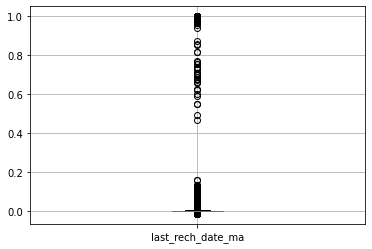

In [62]:
data.boxplot('last_rech_date_ma')

In [63]:
y

array([0, 1, 1, ..., 1, 1, 1])

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test=train_test_split(datafs,Y,random_state=7)

In [0]:
model=RandomForestClassifier()

In [67]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
pre=model.predict(x_test)

In [0]:
from sklearn.metrics import classification_report

In [70]:
print(classification_report(pre,y_test))

              precision    recall  f1-score   support

           0       0.42      0.75      0.54      3723
           1       0.98      0.92      0.95     48676

    accuracy                           0.91     52399
   macro avg       0.70      0.84      0.74     52399
weighted avg       0.94      0.91      0.92     52399



I found that the class of 0 was highly Imbalanced the minority class was about
12.00% and thats why most of the prediction model was predicting higher values 
and to handel this situation we used the concept of Up sampling the data by 
putting duplicate values of Minority
Class

In [0]:
from sklearn.utils import resample
datafs['lable']=Y
df_majority=datafs[datafs.lable==1]
df_minority=datafs[datafs.lable==0]

df_downsamp=resample(df_majority,replace=False,n_samples=23737,random_state=7)

In [72]:
df_downsamp

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,lable
191382,0.814724,0.410001,0.410001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000406,0.002436,0.002436,0.000406,0.002436,0.002436,0.000000,0.000000,1
116468,0.307932,0.002121,0.002121,0.091399,0.091399,0.003812,0.421194,0.000272,0.000000,0.421194,0.421194,0.026573,0.000272,0.000000,0.421194,0.421194,0.026573,0.000272,0.001634,0.001634,0.000272,0.001634,0.001634,0.000000,0.000000,1
47886,0.002902,0.317388,0.318960,0.387959,0.391902,0.001043,0.407615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000065,0.000065,0.511247,0.255624,0.023511,0.000033,0.000391,0.000391,0.000033,0.000391,0.000391,0.000000,0.000000,1
99682,0.997815,0.002531,0.002531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005423,0.032537,0.032537,0.005423,0.032537,0.032537,0.000000,0.000000,1
110726,0.017341,0.402167,0.549879,0.202064,0.267092,0.000195,0.030007,0.000234,0.000156,0.329956,0.044990,0.000097,0.000390,0.000234,0.555006,0.059974,0.001091,0.000078,0.000468,0.000234,0.000195,0.001169,0.000234,0.000260,0.000325,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35078,0.028018,0.004670,0.004670,0.034194,0.034194,0.000293,0.113392,0.000733,0.000293,0.679325,0.113392,0.008889,0.000880,0.000293,0.704703,0.113392,0.006982,0.000733,0.004401,0.000880,0.000733,0.004401,0.000880,0.000675,0.000675,1
192614,0.056246,0.572767,0.572767,0.033804,0.033804,0.000676,0.259950,0.000169,0.000000,0.259950,0.259950,0.016046,0.000169,0.000000,0.259950,0.259950,0.016046,0.000338,0.004054,0.002027,0.000338,0.004054,0.002027,0.000000,0.000000,1
54357,0.062261,0.458518,0.656266,0.168466,0.193600,0.000353,0.060416,0.000118,0.000510,0.211476,0.060416,0.003040,0.000275,0.000196,0.483368,0.060416,0.002255,0.000157,0.000942,0.000236,0.000393,0.002355,0.000236,0.000196,0.000218,1
19648,0.036821,0.092235,0.092624,0.357447,0.379949,0.000099,0.037955,0.000592,0.000099,0.569963,0.038103,0.002706,0.000690,0.000049,0.616593,0.038103,0.002706,0.000493,0.002958,0.000296,0.000641,0.003845,0.000296,0.000158,0.000152,1


In [0]:
df_down=pd.concat([df_downsamp,df_minority])

In [74]:
y=df_down.lable
df_down.drop(['lable'],axis=1,inplace=True)
df_down

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90
191382,0.814724,0.410001,0.410001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000406,0.002436,0.002436,0.000406,0.002436,0.002436,0.00000,0.000000
116468,0.307932,0.002121,0.002121,0.091399,0.091399,0.003812,0.421194,0.000272,0.000000,0.421194,0.421194,0.026573,0.000272,0.000000,0.421194,0.421194,0.026573,0.000272,0.001634,0.001634,0.000272,0.001634,0.001634,0.00000,0.000000
47886,0.002902,0.317388,0.318960,0.387959,0.391902,0.001043,0.407615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000065,0.000065,0.511247,0.255624,0.023511,0.000033,0.000391,0.000391,0.000033,0.000391,0.000391,0.00000,0.000000
99682,0.997815,0.002531,0.002531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005423,0.032537,0.032537,0.005423,0.032537,0.032537,0.00000,0.000000
110726,0.017341,0.402167,0.549879,0.202064,0.267092,0.000195,0.030007,0.000234,0.000156,0.329956,0.044990,0.000097,0.000390,0.000234,0.555006,0.059974,0.001091,0.000078,0.000468,0.000234,0.000195,0.001169,0.000234,0.00026,0.000325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209547,0.017632,0.653490,0.653659,0.209399,0.318622,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000115,0.000691,0.000691,0.000115,0.000691,0.000691,0.00000,0.000000
209549,0.059003,0.051040,0.053087,0.522900,0.667573,0.000070,0.053894,0.000070,0.000000,0.053894,0.053894,0.001387,0.000140,0.002800,0.458935,0.229468,0.003487,0.000070,0.000420,0.000420,0.000140,0.000840,0.000420,0.00000,0.001785
209554,0.160290,0.313360,0.314924,0.120590,0.141176,0.006679,0.497458,0.000000,0.000000,0.000000,0.000000,0.000000,0.000215,0.000000,0.497458,0.497458,0.004309,0.000215,0.001293,0.001293,0.000215,0.001293,0.001293,0.00000,0.000000
209571,0.109254,0.246735,0.248520,0.247799,0.305521,0.001850,0.254177,0.000264,0.000396,0.508355,0.254177,0.000819,0.000264,0.000396,0.508355,0.254177,0.000819,0.000132,0.000793,0.000793,0.000132,0.000793,0.000793,0.00000,0.000000


In [75]:
x_train,x_test,y_train,y_test=train_test_split(df_down,y,random_state=7)
model=RandomForestClassifier()
model.fit(x_train,y_train)
pre=model.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(pre,y_test))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      6444
           1       0.81      0.79      0.80      6031

    accuracy                           0.81     12475
   macro avg       0.81      0.81      0.81     12475
weighted avg       0.81      0.81      0.81     12475



In [76]:
y=datafs['lable']
datafs.drop(['lable'],axis=1,inplace=True)
pre=model.predict(datafs)
from sklearn.metrics import classification_report
print(classification_report(pre,y))

              precision    recall  f1-score   support

           0       0.95      0.43      0.60     57480
           1       0.82      0.99      0.90    152113

    accuracy                           0.84    209593
   macro avg       0.89      0.71      0.75    209593
weighted avg       0.86      0.84      0.82    209593



In [0]:
datafs['label']=y[:]

In [78]:
df_majority=datafs[datafs.label==1]
df_minority=datafs[datafs.label==0]

df_upsamp=resample(df_minority,replace=True,n_samples=166264,random_state=7)

df_up=pd.concat([df_majority,df_upsamp])
y=df_up.label
df_up.drop('label',axis=1,inplace=True)
x_train,x_test,y_train,y_test=train_test_split(df_up,y,random_state=7)
model=RandomForestClassifier()
model.fit(x_train,y_train)
pre=model.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(pre,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     43378
           1       0.95      1.00      0.97     44046

    accuracy                           0.97     87424
   macro avg       0.97      0.97      0.97     87424
weighted avg       0.97      0.97      0.97     87424



In [79]:
y=datafs['label']
datafs.drop(['label'],axis=1,inplace=True)
pre=model.predict(datafs)
from sklearn.metrics import classification_report
print(classification_report(pre,y))
from sklearn.metrics import confusion_matrix
result=confusion_matrix(pre,y)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     28312
           1       0.99      1.00      0.99    181281

    accuracy                           0.99    209593
   macro avg       0.99      0.96      0.98    209593
weighted avg       0.99      0.99      0.99    209593



In [0]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_test)

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))
from sklearn.metrics import confusion_matrix
result=confusion_matrix(y_pred,y_test)


              precision    recall  f1-score   support

           0       0.78      0.79      0.79     40705
           1       0.82      0.81      0.81     46719

    accuracy                           0.80     87424
   macro avg       0.80      0.80      0.80     87424
weighted avg       0.80      0.80      0.80     87424



In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)


In [84]:
from sklearn.metrics import confusion_matrix
result=confusion_matrix(y_pred,y_test)
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86     50053
           1       0.77      0.95      0.85     37371

    accuracy                           0.86     87424
   macro avg       0.86      0.87      0.86     87424
weighted avg       0.88      0.86      0.86     87424



In [0]:
from xgboost import XGBClassifier


In [0]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train) 
prediction = xgb_model.predict(x_test) 

In [88]:
from sklearn.metrics import confusion_matrix
result=confusion_matrix(y_pred,y_test)
from sklearn.metrics import classification_report
print(classification_report(prediction,y_test))


              precision    recall  f1-score   support

           0       0.78      0.79      0.78     40720
           1       0.81      0.80      0.81     46704

    accuracy                           0.80     87424
   macro avg       0.80      0.80      0.80     87424
weighted avg       0.80      0.80      0.80     87424



In [0]:
from sklearn.metrics import f1_score

In [90]:
f1_score(y_test, prediction)

0.8091193273687615